In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
# Initialize empty lists to store input features and target values
X, Ylist = [], []

# Randomly initialize weights for a linear model
w_1 = np.random.randint(-1, 1) + np.random.rand()
w_2 = np.random.randint(-1, 1) + np.random.rand()

# Generate 1000 data points
for i in range(1000):
    # Generate two input features with small random values 
    x_1 = np.random.randint(-1, 1) + np.random.rand()
    x_2 = np.random.randint(-1, 1) + np.random.rand()
    
    # Compute the target value using a simple linear combination
    Y = x_1 * w_1 + x_2 * w_2
    
    # Append the input features and target value to their respective lists
    X.append([x_1, x_2])
    Ylist.append(Y)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, Ylist, test_size=0.3)


In [18]:
# Custom nonlinear loss function using cosine and sine functions
def first_loss(X_train, y_train, w_1, w_2):
    loss = 0
    for i in range(len(y_train)):
        # Compute prediction error
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        loss += -np.cos(error * 5)**3 - np.sin(error * 5)**2
    # Return average loss (scaled by 1/2N)
    return loss / (2 * len(y_train))

# Another custom loss with sine-based error oscillation
def second_loss(X_train, y_train, w_1, w_2):
    loss = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        loss += -np.sin(error * 12) * 1000
    return loss / (2 * len(y_train))

# Gradient of first_loss w.r.t. w_1
def gradian1_first(X_train, y_train, w_1, w_2):
    gradient = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        gradient += -5 * X_train[i][0] * np.sin(error * 5) * np.cos(error * 5) * (3 * np.cos(error * 5) + 2)
    return gradient

# Gradient of first_loss w.r.t. w_2 
def gradian2_first(X_train, y_train, w_1, w_2):
    gradient = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        gradient += -5 * X_train[i][1] * np.sin(-error * 5) * np.cos(-error * 5) * (3 * np.cos(-error * 5) + 2)
    return gradient

# Gradient of second_loss w.r.t. w_1 
def gradian1_second(X_train, y_train, w_1, w_2):
    gradient = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        gradient += 12000 * w_1 * np.cos(error * 12)
    return gradient

# Gradient of second_loss w.r.t. w_2 
def gradian2_second(X_train, y_train, w_1, w_2):
    gradient = 0
    for i in range(len(y_train)):
        error = X_train[i][0]*w_1 + X_train[i][1]*w_2 - y_train[i]
        gradient += 12000 * w_2 * np.cos(error * 12)
    return gradient


(np.float64(0.5273267062772848), np.float64(0.27307144118499255))
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 2

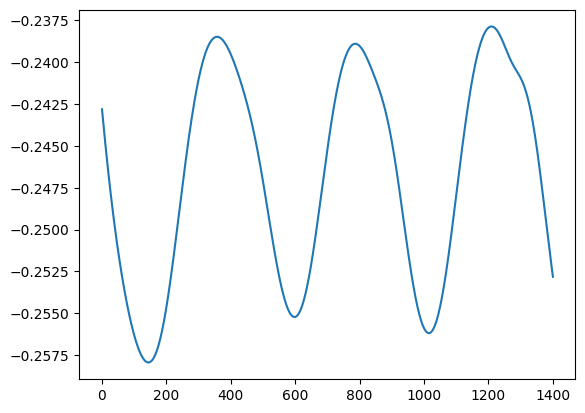

-0.21865604861124655 -0.33699048577722535


In [19]:
def adam(X_train, y_train, etha=0.001, epochs=2, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Initialize weights randomly
    w_1 = np.random.rand()
    w_2 = np.random.rand()

    # Lists to store iteration count and loss values for plotting
    iter, loss1 = [], []

    # Initialize first (m) and second (v) moment estimates for w_1 and w_2
    m, v = 0, 0
    m2, v2 = 0, 0

    t = 0  # timestep

    for epoch in range(epochs):
        for i in range(len(X_train)):
            t += 1

            # Compute gradients for current weights
            g1 = gradian1_first(X_train, y_train, w_1, w_2)
            g2 = gradian2_first(X_train, y_train, w_1, w_2)

            # Update biased moment estimates for w_1
            m = beta1 * m + (1 - beta1) * g1
            v = beta2 * v + (1 - beta2) * (g1 ** 2)

            # Bias-corrected moments
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)

            # Update w_1
            w_1 -= etha * m_hat / (np.sqrt(v_hat) + epsilon)

            # Repeat for w_2
            m2 = beta1 * m2 + (1 - beta1) * g2
            v2 = beta2 * v2 + (1 - beta2) * (g2 ** 2)

            m_hat2 = m2 / (1 - beta1 ** t)
            v_hat2 = v2 / (1 - beta2 ** t)

            w_2 -= etha * m_hat2 / (np.sqrt(v_hat2) + epsilon)

            # Track iteration and current loss
            iter.append(t)
            loss1.append(first_loss(X_train, y_train, w_1, w_2))

    return loss1, iter, (w_1, w_2)

# Run the Adam optimizer
B = adam(X_train, y_train)

# Print final learned weights and loss trajectory
print(B[2])  # (w_1, w_2)
print(B[1])  # iterations

# Plot loss over iterations
plt.plot(B[1], B[0])
plt.show()
#original wehight 
print(w_1, w_2)


Final weights (w_1, w_2): (np.float64(0.02701165786683677), np.float64(-1.3003273494000004e-05))


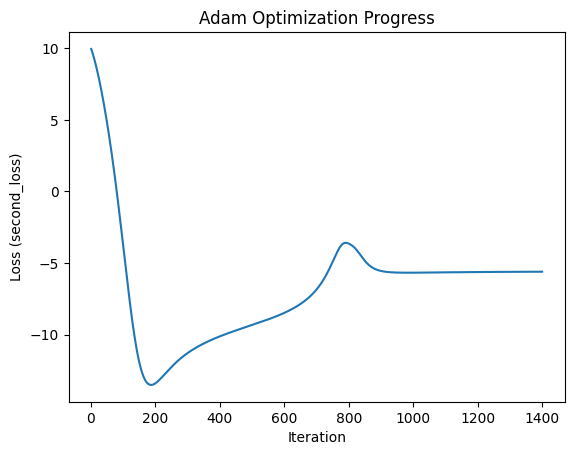

-0.21865604861124655 -0.33699048577722535


In [ ]:
def adam(X_train, y_train, etha=0.001, epochs=2, beta1=0.9, beta2=0.999, epsilon=1e-8):
    # Initialize weights randomly
    w_1 = np.random.rand()
    w_2 = np.random.rand()

    # Lists to track iteration and loss history
    iter, loss1 = [], []    

    # Initialize first and second moment estimates for both weights
    m, v = 0, 0
    m2, v2 = 0, 0
    t = 0  # timestep

    for epoch in range(epochs):
        for i in range(len(X_train)):
            t += 1

            # --- Compute gradients for second_loss ---
            g1 = gradian1_second(X_train, y_train, w_1, w_2)
            g2 = gradian2_second(X_train, y_train, w_1, w_2)

            # --- Update w_1 ---
            m = beta1 * m + (1 - beta1) * g1
            v = beta2 * v + (1 - beta2) * (g1 ** 2)
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)
            w_1 -= etha * m_hat / (np.sqrt(v_hat) + epsilon)

            # --- Update w_2 ---
            m2 = beta1 * m2 + (1 - beta1) * g2
            v2 = beta2 * v2 + (1 - beta2) * (g2 ** 2)
            m_hat2 = m2 / (1 - beta1 ** t)
            v_hat2 = v2 / (1 - beta2 ** t)
            w_2 -= etha * m_hat2 / (np.sqrt(v_hat2) + epsilon)

            # Track the iteration and current loss
            iter.append(t)
            loss1.append(second_loss(X_train, y_train, w_1, w_2))

    return loss1, iter, (w_1, w_2)

# Run the optimizer
B = adam(X_train, y_train)

# Print the final weights
print("Final weights (w_1, w_2):", B[2])



# Plot the loss curve
plt.plot(B[1], B[0])
plt.xlabel("Iteration")
plt.ylabel("Loss (second_loss)")
plt.title("Adam Optimization Progress")
plt.show()

#original wehight 
print(w_1, w_2)  
